In [ ]:
pip install vaderSentiment

In [ ]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk

import random


import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import the necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

datafile = 'chatgpt.csv'

try:
    data = pd.read_csv(datafile)
    print("CSV file loaded successfully.")
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Print the number of rows loaded
print(f"Number of rows loaded: {len(data)}")


CSV file loaded successfully.
Number of rows loaded: 151418


In [ ]:
import pandas as pd

bad_lines = []

def handle_bad_lines(line, error_message):
    bad_lines.append((line, error_message))
    return None

try:
    data = pd.read_csv(datafile, on_bad_lines=handle_bad_lines)
    print("CSV file loaded with bad lines handled.")
except Exception as e:
    print(f"An error occurred: {e}")

# Print the number of rows loaded
print(f"Number of rows loaded: {len(data)}")

# Log bad lines
if bad_lines:
    print("Bad lines encountered:")
    for line, error_message in bad_lines[:10]:  # Print the first 10 bad lines
        print(f"Line: {line}, Error: {error_message}")

# Print the first few rows of the dataset to verify
print(data.head())


An error occurred: on_bad_line can only be a callable function if engine='python'
Number of rows loaded: 151418
                                            entities  \
0  {'annotations': [{'start': 235, 'end': 237, 'p...   
1  {'annotations': [{'start': 33, 'end': 39, 'pro...   
2  {'annotations': [{'start': 230, 'end': 232, 'p...   
3  {'annotations': [{'start': 56, 'end': 62, 'pro...   
4  {'hashtags': [{'start': 211, 'end': 216, 'tag'...   

                                   referenced_tweets  \
0  [{'type': 'replied_to', 'id': '163579010076741...   
1                                                NaN   
2  [{'type': 'replied_to', 'id': '163557271457965...   
3                                                NaN   
4  [{'type': 'replied_to', 'id': '163562746728430...   

                                                text  \
0  @cryptogems555 Invest in a currency that is de...   
1  While having all the hope around chatGPT lets ...   
2  @IGDEFI1 Join the movement towards a more s

In [ ]:
import pandas as pd

bad_lines = []

def handle_bad_lines(line, error_message):
    bad_lines.append((line, error_message))
    return None

try:
    data = pd.read_csv(datafile, on_bad_lines=handle_bad_lines)
    print("CSV file loaded with bad lines handled.")
except Exception as e:
    print(f"An error occurred: {e}")

# Print the number of rows loaded
print(f"Number of rows loaded: {len(data)}")

# Log bad lines
if bad_lines:
    print("Bad lines encountered:")
    for line, error_message in bad_lines[:10]:  # Print the first 10 bad lines
        print(f"Line: {line}, Error: {error_message}")

# Print the first few rows of the dataset to verify
print(data.head())


An error occurred: on_bad_line can only be a callable function if engine='python'
Number of rows loaded: 151418
                                            entities  \
0  {'annotations': [{'start': 235, 'end': 237, 'p...   
1  {'annotations': [{'start': 33, 'end': 39, 'pro...   
2  {'annotations': [{'start': 230, 'end': 232, 'p...   
3  {'annotations': [{'start': 56, 'end': 62, 'pro...   
4  {'hashtags': [{'start': 211, 'end': 216, 'tag'...   

                                   referenced_tweets  \
0  [{'type': 'replied_to', 'id': '163579010076741...   
1                                                NaN   
2  [{'type': 'replied_to', 'id': '163557271457965...   
3                                                NaN   
4  [{'type': 'replied_to', 'id': '163562746728430...   

                                                text  \
0  @cryptogems555 Invest in a currency that is de...   
1  While having all the hope around chatGPT lets ...   
2  @IGDEFI1 Join the movement towards a more s

In [ ]:
data

,entities,referenced_tweets,text,created_at,edit_history_tweet_ids,author_id,id,withheld
0,"{'annotations': [{'start': 235, 'end': 237, 'p...","[{'type': 'replied_to', 'id': '163579010076741...",@cryptogems555 Invest in a currency that is de...,2023-03-14T23:59:11.000Z,['1635792723268497408'],1566208289058295813,1635792723268497408,NaN
1,"{'annotations': [{'start': 33, 'end': 39, 'pro...",NaN,While having all the hope around chatGPT lets ...,2023-03-14T23:58:47.000Z,['1635792623972564992'],1617818893602398208,1635792623972564992,NaN
2,"{'annotations': [{'start': 230, 'end': 232, 'p...","[{'type': 'replied_to', 'id': '163557271457965...",@IGDEFI1 Join the movement towards a more sust...,2023-03-14T23:58:46.000Z,['1635792616594763778'],1566208289058295813,1635792616594763778,NaN
3,"{'annotations': [{'start': 56, 'end': 62, 'pro...",NaN,"There's a snowstorm out so naturally, I decide...",2023-03-14T23:58:42.000Z,['1635792600916475904'],43531614,1635792600916475904,NaN
4,"{'hashtags': [{'start': 211, 'end': 216, 'tag'...","[{'type': 'replied_to', 'id': '163562746728430...",@unclebobcrypto @Stablzone Invest in a currenc...,2023-03-14T23:58:04.000Z,['1635792443537850368'],1566208289058295813,1635792443537850368,NaN
...,...,...,...,...,...,...,...,...
151413,"{'hashtags': [{'start': 8, 'end': 13, 'tag': '...",NaN,🟥 About #BING #ChatGPT &amp; LLMs. \n\nLarge l...,2023-02-15T08:08:08.000Z,['1625768911110275073'],14125938,1625768911110275073,NaN
151414,"{'hashtags': [{'start': 117, 'end': 120, 'tag'...",NaN,No need to use ChatGPT's old URL\nhttps://t.co...,2023-02-15T08:07:35.000Z,['1625768771163144197'],16632593,1625768771163144197,NaN
151415,"{'hashtags': [{'start': 69, 'end': 77, 'tag': ...",NaN,https://t.co/3zT1ItCymG Get Your Business Doma...,2023-02-15T08:06:37.000Z,['1625768531550961665'],1570773043496243200,1625768531550961665,NaN
151416,"{'hashtags': [{'start': 81, 'end': 89, 'tag': ...",NaN,We provide high-quality and innovative multime...,2023-02-15T08:06:35.000Z,['1625768520360292353'],1392555937714647041,1625768520360292353,NaN


In [ ]:
# Download NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to clean and preprocess a single chat message
def clean_and_preprocess(chat):
    # Convert to lowercase
    chat = chat.lower()

    # Remove URLs
    chat = re.sub(r'http\S+|www\S+|https\S+', '', chat, flags=re.MULTILINE)

    # Remove mentions
    chat = re.sub(r'@\w+', '', chat)

    # Remove special characters and numbers
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)

    # Tokenize the chat
    words = word_tokenize(chat)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_chat = ' '.join(words)

    return cleaned_chat

# Apply the cleaning function to each chat message in the 'text' column
if 'text' in data.columns:
    data['cleaned_text'] = data['text'].apply(clean_and_preprocess)

    # Create an instance of the VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Define a function to perform sentiment analysis using VADER
    def get_sentiment(chat):
        Rating = analyzer.polarity_scores(chat)
        compound_score = Rating['compound']
        return compound_score

    # Apply the function to the 'cleaned_text' column of the DataFrame
    data['SentimentVADER'] = data['cleaned_text'].apply(get_sentiment)

    # Print the DataFrame with sentiment scores
    print(data[['cleaned_text', 'SentimentVADER']].head())
else:
    print("The column 'text' does not exist in the dataset.")

                                        cleaned_text  SentimentVADER
0  invest currency designed offer greater flexibi...          0.5994
1  hope around chatgpt lets forget tools domains ...          0.2500
2  join movement towards sustainable responsible ...          0.7269
3  theres snowstorm naturally decided ask chatgpt...          0.0000
4  invest currency offers secure private confiden...          0.3400


In [ ]:
# Check the number of rows in the dataset
num_rows = data.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

data.head(10)

Number of rows in the dataset: 151418


,entities,referenced_tweets,text,created_at,edit_history_tweet_ids,author_id,id,withheld,cleaned_text,SentimentVADER
0,"{'annotations': [{'start': 235, 'end': 237, 'p...","[{'type': 'replied_to', 'id': '163579010076741...",@cryptogems555 Invest in a currency that is de...,2023-03-14T23:59:11.000Z,['1635792723268497408'],1566208289058295813,1635792723268497408,NaN,invest currency designed offer greater flexibi...,0.5994
1,"{'annotations': [{'start': 33, 'end': 39, 'pro...",NaN,While having all the hope around chatGPT lets ...,2023-03-14T23:58:47.000Z,['1635792623972564992'],1617818893602398208,1635792623972564992,NaN,hope around chatgpt lets forget tools domains ...,0.2500
2,"{'annotations': [{'start': 230, 'end': 232, 'p...","[{'type': 'replied_to', 'id': '163557271457965...",@IGDEFI1 Join the movement towards a more sust...,2023-03-14T23:58:46.000Z,['1635792616594763778'],1566208289058295813,1635792616594763778,NaN,join movement towards sustainable responsible ...,0.7269
3,"{'annotations': [{'start': 56, 'end': 62, 'pro...",NaN,"There's a snowstorm out so naturally, I decide...",2023-03-14T23:58:42.000Z,['1635792600916475904'],43531614,1635792600916475904,NaN,theres snowstorm naturally decided ask chatgpt...,0.0000
4,"{'hashtags': [{'start': 211, 'end': 216, 'tag'...","[{'type': 'replied_to', 'id': '163562746728430...",@unclebobcrypto @Stablzone Invest in a currenc...,2023-03-14T23:58:04.000Z,['1635792443537850368'],1566208289058295813,1635792443537850368,NaN,invest currency offers secure private confiden...,0.3400
5,"{'annotations': [{'start': 38, 'end': 44, 'pro...",NaN,Robots will take over the world 🤖🤖🤖 #ChatGPT ...,2023-03-14T23:57:49.000Z,['1635792377796530176'],1635792037336465409,1635792377796530176,NaN,robots take world chatgpt gpt nft eth nftcommu...,0.0000
6,"{'hashtags': [{'start': 213, 'end': 218, 'tag'...","[{'type': 'replied_to', 'id': '163563835451450...",@trycarbonio Join the community of investors w...,2023-03-14T23:57:28.000Z,['1635792292526030850'],1566208289058295813,1635792292526030850,NaN,join community investors committed advancing p...,0.5106
7,"{'annotations': [{'start': 42, 'end': 43, 'pro...",NaN,⏰Ready to start saving lots of time with #AI?\...,2023-03-14T23:57:01.000Z,['1635792177098891267'],575792221,1635792177098891267,NaN,ready start saving lots time ai maximize time ...,0.8074
8,"{'annotations': [{'start': 13, 'end': 19, 'pro...",NaN,Not sure if #ChatGPT wrote this article…https:...,2023-03-14T23:56:57.000Z,['1635792160695152642'],102843132,1635792160695152642,NaN,sure chatgpt wrote article,0.3182
9,"{'annotations': [{'start': 43, 'end': 44, 'pro...",NaN,News Alert! // https://t.co/hikG9EHGC9 // #AI ...,2023-03-14T23:56:51.000Z,['1635792136816803840'],1613361844097544192,1635792136816803840,NaN,news alert ai chatgpt scifi news,0.2960


Sentiment Analysis

In [ ]:
#Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Define a function to perform sentiment analysis using VADER
def get_sentiment(chat):
    Rating = analyzer.polarity_scores(chat)
    compound_score = Rating['compound']
    return compound_score

# Apply the function to the 'tokens' column of the DataFrame
data['SentimentVADER'] = data['cleaned_text'].apply(get_sentiment)

# Print the DataFrame with sentiment scores
print(data['SentimentVADER'])

0         0.5994
1         0.2500
2         0.7269
3         0.0000
4         0.3400
           ...  
151413   -0.4215
151414    0.4588
151415    0.0000
151416    0.6597
151417    0.8834
Name: SentimentVADER, Length: 151418, dtype: float64


In [ ]:
data.head(10)

,entities,referenced_tweets,text,created_at,edit_history_tweet_ids,author_id,id,withheld,cleaned_text,SentimentVADER
0,"{'annotations': [{'start': 235, 'end': 237, 'p...","[{'type': 'replied_to', 'id': '163579010076741...",@cryptogems555 Invest in a currency that is de...,2023-03-14T23:59:11.000Z,['1635792723268497408'],1566208289058295813,1635792723268497408,NaN,invest currency designed offer greater flexibi...,0.5994
1,"{'annotations': [{'start': 33, 'end': 39, 'pro...",NaN,While having all the hope around chatGPT lets ...,2023-03-14T23:58:47.000Z,['1635792623972564992'],1617818893602398208,1635792623972564992,NaN,hope around chatgpt lets forget tools domains ...,0.2500
2,"{'annotations': [{'start': 230, 'end': 232, 'p...","[{'type': 'replied_to', 'id': '163557271457965...",@IGDEFI1 Join the movement towards a more sust...,2023-03-14T23:58:46.000Z,['1635792616594763778'],1566208289058295813,1635792616594763778,NaN,join movement towards sustainable responsible ...,0.7269
3,"{'annotations': [{'start': 56, 'end': 62, 'pro...",NaN,"There's a snowstorm out so naturally, I decide...",2023-03-14T23:58:42.000Z,['1635792600916475904'],43531614,1635792600916475904,NaN,theres snowstorm naturally decided ask chatgpt...,0.0000
4,"{'hashtags': [{'start': 211, 'end': 216, 'tag'...","[{'type': 'replied_to', 'id': '163562746728430...",@unclebobcrypto @Stablzone Invest in a currenc...,2023-03-14T23:58:04.000Z,['1635792443537850368'],1566208289058295813,1635792443537850368,NaN,invest currency offers secure private confiden...,0.3400
5,"{'annotations': [{'start': 38, 'end': 44, 'pro...",NaN,Robots will take over the world 🤖🤖🤖 #ChatGPT ...,2023-03-14T23:57:49.000Z,['1635792377796530176'],1635792037336465409,1635792377796530176,NaN,robots take world chatgpt gpt nft eth nftcommu...,0.0000
6,"{'hashtags': [{'start': 213, 'end': 218, 'tag'...","[{'type': 'replied_to', 'id': '163563835451450...",@trycarbonio Join the community of investors w...,2023-03-14T23:57:28.000Z,['1635792292526030850'],1566208289058295813,1635792292526030850,NaN,join community investors committed advancing p...,0.5106
7,"{'annotations': [{'start': 42, 'end': 43, 'pro...",NaN,⏰Ready to start saving lots of time with #AI?\...,2023-03-14T23:57:01.000Z,['1635792177098891267'],575792221,1635792177098891267,NaN,ready start saving lots time ai maximize time ...,0.8074
8,"{'annotations': [{'start': 13, 'end': 19, 'pro...",NaN,Not sure if #ChatGPT wrote this article…https:...,2023-03-14T23:56:57.000Z,['1635792160695152642'],102843132,1635792160695152642,NaN,sure chatgpt wrote article,0.3182
9,"{'annotations': [{'start': 43, 'end': 44, 'pro...",NaN,News Alert! // https://t.co/hikG9EHGC9 // #AI ...,2023-03-14T23:56:51.000Z,['1635792136816803840'],1613361844097544192,1635792136816803840,NaN,news alert ai chatgpt scifi news,0.2960


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming 'data' is your DataFrame with 'cleaned_text' and 'SentimentVADER' columns

# Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment based on VADER score
def categorize_sentiment(score):
    if score < 0:
        return 'negative'
    elif score > 0:
        return 'positive'
    else:
        return 'neutral'

# Apply the function to create the 'SentimentCategory' column
data['SentimentCategory'] = data['SentimentVADER'].apply(categorize_sentiment)

# Print the DataFrame with cleaned text, sentiment scores, and categories
print(data[['cleaned_text', 'SentimentVADER', 'SentimentCategory']].head())

                                        cleaned_text  SentimentVADER  \
0  invest currency designed offer greater flexibi...          0.5994   
1  hope around chatgpt lets forget tools domains ...          0.2500   
2  join movement towards sustainable responsible ...          0.7269   
3  theres snowstorm naturally decided ask chatgpt...          0.0000   
4  invest currency offers secure private confiden...          0.3400   

  SentimentCategory  
0          positive  
1          positive  
2          positive  
3           neutral  
4          positive  


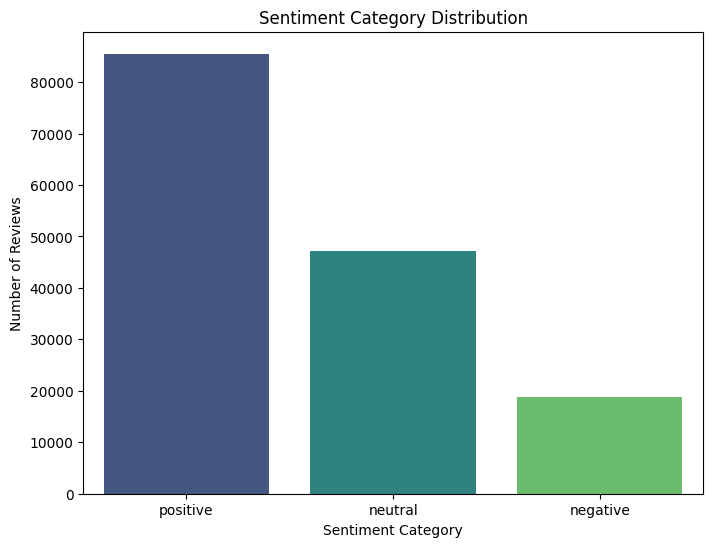

In [ ]:
# Count the number of each sentiment category
sentiment_counts = data['SentimentCategory'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

Topic Modelling

In [ ]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Assuming 'chatgpt.csv' is your dataset file
datafile = 'chatgpt.csv'
data = pd.read_csv(datafile, encoding='latin1')  # Adjust encoding if necessary

# Assuming you have columns like 'text' and 'created_at' to work with
# Example: Assigning 'created_at' column as datetime and dropping unnecessary columns
data['created_at'] = pd.to_datetime(data['created_at'])
data.drop(['author_id', 'id', 'withheld'], axis=1, inplace=True)  # Drop unnecessary columns

# Displaying the number of entries and the first few rows
print("Number of entries: ", len(data))
print(data.head())

Number of entries:  151418
                                            entities  \
0  {'annotations': [{'start': 235, 'end': 237, 'p...   
1  {'annotations': [{'start': 33, 'end': 39, 'pro...   
2  {'annotations': [{'start': 230, 'end': 232, 'p...   
3  {'annotations': [{'start': 56, 'end': 62, 'pro...   
4  {'hashtags': [{'start': 211, 'end': 216, 'tag'...   

                                   referenced_tweets  \
0  [{'type': 'replied_to', 'id': '163579010076741...   
1                                                NaN   
2  [{'type': 'replied_to', 'id': '163557271457965...   
3                                                NaN   
4  [{'type': 'replied_to', 'id': '163562746728430...   

                                                text  \
0  @cryptogems555 Invest in a currency that is de...   
1  While having all the hope around chatGPT lets ...   
2  @IGDEFI1 Join the movement towards a more sust...   
3  There's a snowstorm out so naturally, I decide...   
4  @unclebobcrypto 

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import gensim
from gensim import corpora, models
import logging
import tempfile

# Function to clean and preprocess a single chat message
def clean_and_preprocess(chat):
    # Convert to lowercase
    chat = chat.lower()

    # Remove URLs
    chat = re.sub(r'http\S+|www\S+|https\S+', '', chat, flags=re.MULTILINE)

    # Remove mentions
    chat = re.sub(r'@\w+', '', chat)

    # Remove special characters and numbers
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)

    # Tokenize the chat
    words = word_tokenize(chat)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

# Apply the cleaning function to each chat message in the 'text' column
data['cleaned_text'] = data['text'].apply(clean_and_preprocess)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(data[['text', 'cleaned_text']].head())



Cleaned Dataset:
                                                text  \
0  @cryptogems555 Invest in a currency that is de...   
1  While having all the hope around chatGPT lets ...   
2  @IGDEFI1 Join the movement towards a more sust...   
3  There's a snowstorm out so naturally, I decide...   
4  @unclebobcrypto @Stablzone Invest in a currenc...   

                                        cleaned_text  
0  [invest, currency, designed, offer, greater, f...  
1  [hope, around, chatgpt, lets, forget, tools, d...  
2  [join, movement, towards, sustainable, respons...  
3  [theres, snowstorm, naturally, decided, ask, c...  
4  [invest, currency, offers, secure, private, co...  


Folder "/tmp" will be used to save temporary dictionary and corpus.
Topics:

Topics DataFrame:
      aipad    future      part       nft      agix     ready    invest  \
0  0.016949  0.015754  0.015431  0.014894  0.012491  0.011774  0.011684   
1  0.000000  0.000000  0.000000  0.000000  0.006211  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

    airdrop       web       fet  ...       usd   unknown  transaction  \
0  0.011216  0.009039  0.008832  ...  0.000000  0.000000      0.00000   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000      0.00000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.000000      0.00000   
3  0.000000  0.000000  0.000000  ...  0.000000  0.000000      0.00000   
4  0.000000  0.000000  0.000000  ...  0.003146  0.003095      0.00301   

     alert    t

<Figure size 1200x800 with 0 Axes>

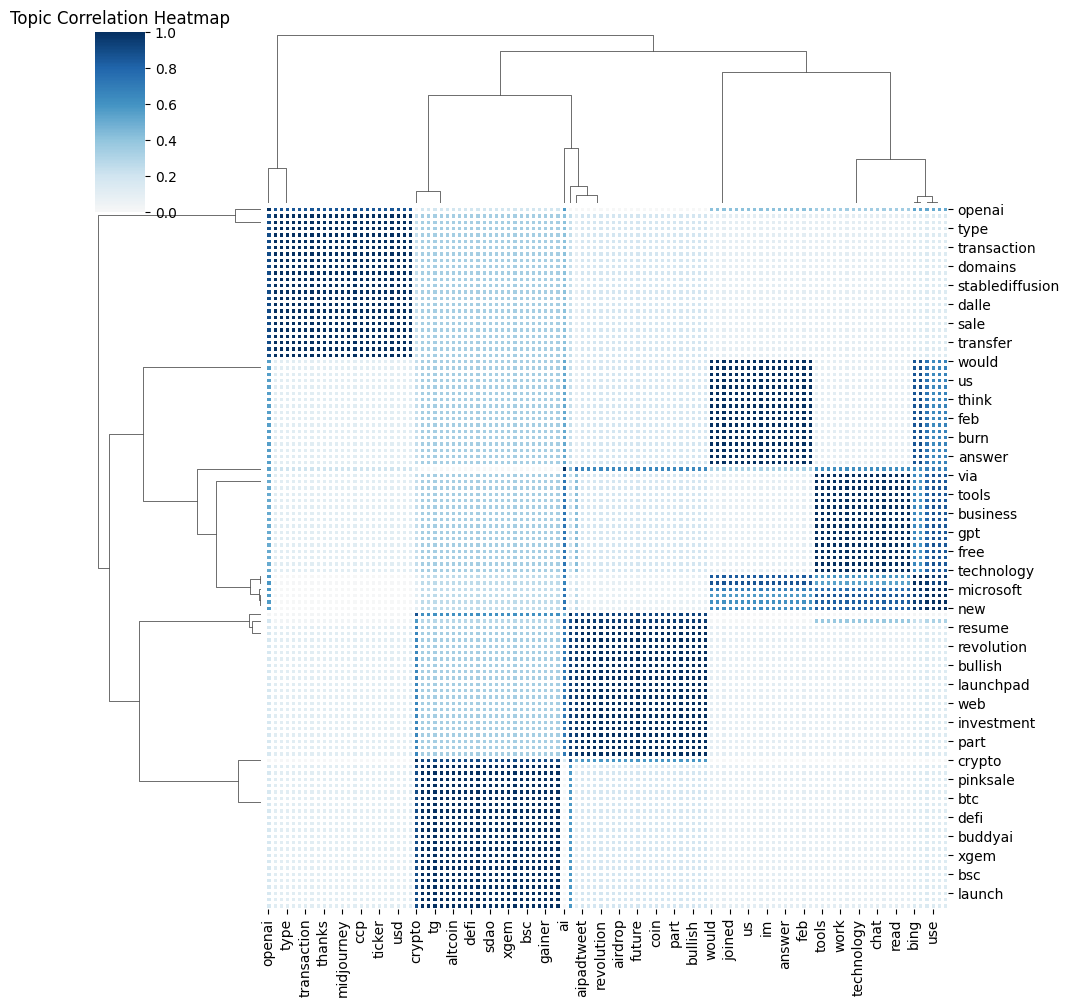

In [ ]:
import os
import pandas as pd
from nltk.corpus import stopwords
from string import punctuation
import gensim
from gensim import corpora, models
import logging
import tempfile
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# Define temporary folder for storing dictionary and corpus
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

# Function to clean and preprocess a single chat message
def clean_and_preprocess(chat):
    # Convert to lowercase
    chat = chat.lower()

    # Remove URLs
    chat = re.sub(r'http\S+|www\S+|https\S+', '', chat, flags=re.MULTILINE)

    # Remove mentions
    chat = re.sub(r'@\w+', '', chat)

    # Remove special characters and numbers
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)

    # Tokenize the chat
    words = word_tokenize(chat)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

# Assuming 'data' DataFrame has 'cleaned_text' column after preprocessing
texts = data['cleaned_text'].tolist()

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'chatgpt.dict'))  # Save the dictionary

corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'chatgpt.mm'), corpus)  # Save the corpus

# Create TF-IDF model
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Perform LDA topic modeling
total_topics = 5  # Number of topics
lda = gensim.models.LdaMulticore(corpus_tfidf, id2word=dictionary, num_topics=total_topics)

# Show topics
print("Topics:")
lda.show_topics(total_topics, 10)

# Prepare data for visualization
data_lda = {i: OrderedDict(lda.show_topic(i, 25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda).fillna(0).T

# Display the topics
print("\nTopics DataFrame:")
print(df_lda)

# Visualize topics with a clustermap
plt.figure(figsize=(12, 8))
g = sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('Topic Correlation Heatmap')
plt.show()

NLP

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


                                        cleaned_text  \
0  @cryptogems555 Invest in a currency that is de...   
1  While having all the hope around chatGPT lets ...   
2  @IGDEFI1 Join the movement towards a more sust...   
3  There's a snowstorm out so naturally, I decide...   
4  @unclebobcrypto @Stablzone Invest in a currenc...   

                                            entities  
0      [(@cryptogems555 Invest, PERSON), (gpt, ORG)]  
1  [(ArtificialIntelligence MachineLearning chatg...  
2                 [(@IGDEFI1 Join, ORG), (gpt, ORG)]  
3                 [(Chatgpt, ORG), (Xena ð, ORG)]  
4  [(@unclebobcrypto @Stablzone Invest, ORG), (gp...  


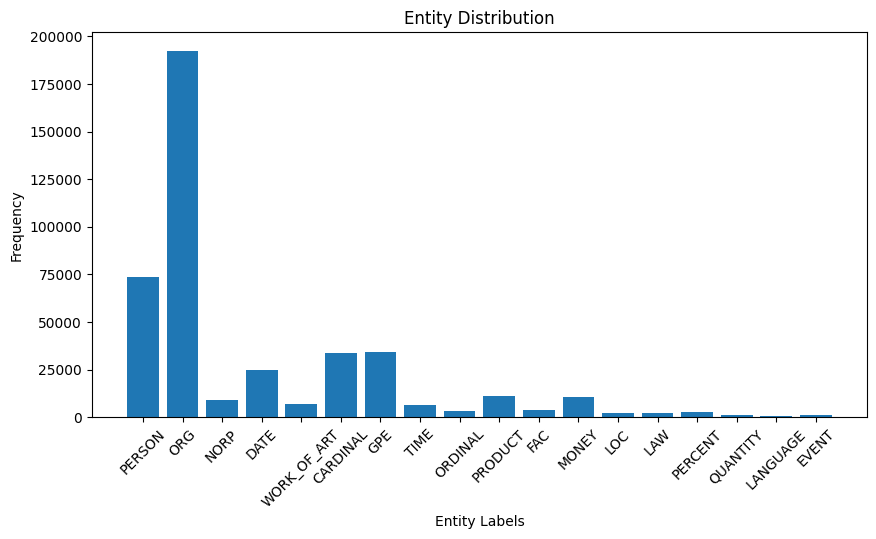

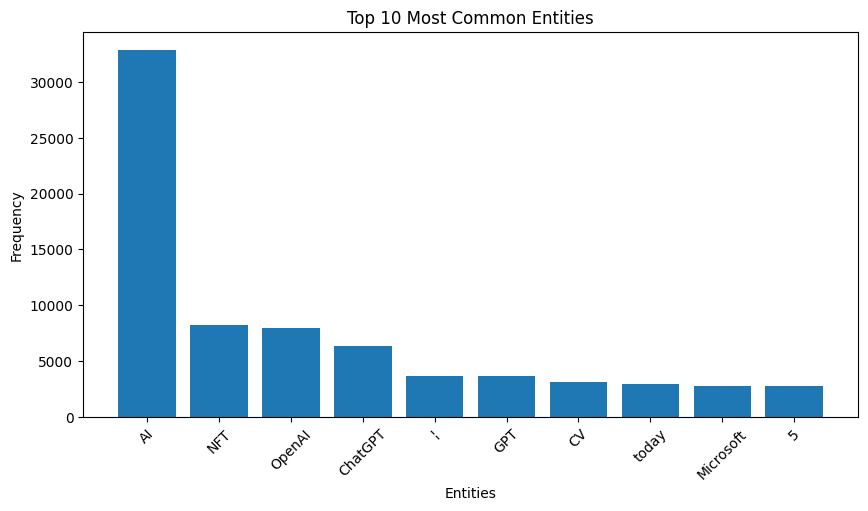

In [ ]:
# Import necessary libraries
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load your dataset
datafile = 'chatgpt.csv'
data = pd.read_csv(datafile, encoding='latin1')

# Function to clean the text by removing hashtags
def remove_hashtags(text):
    return re.sub(r'#', '', text)

# Apply the cleaning function to the text column
data['cleaned_text'] = data['text'].apply(remove_hashtags)

# Function to perform NER on a single document
def perform_ner(doc):
    doc_nlp = nlp(doc)
    entities = [(entity.text, entity.label_) for entity in doc_nlp.ents]
    return entities

# Apply NER to each document in the 'cleaned_text' column
data['entities'] = data['cleaned_text'].apply(lambda x: perform_ner(x))

# Display the first few rows with entities
print(data[['cleaned_text', 'entities']].head())

# Flatten the list of entities for visualization
all_entities = [entity for sublist in data['entities'].tolist() for entity in sublist]

# Count the frequency of each entity label
entity_labels = [entity[1] for entity in all_entities]
entity_counts = Counter(entity_labels)

# Plot the entity distribution
plt.figure(figsize=(10, 5))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Entity Distribution')
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# For better visualization of specific entities, you can also plot top N entities
entity_texts = [entity[0] for entity in all_entities]
most_common_entities = Counter(entity_texts).most_common(10)

# Plot the most common entities
labels, values = zip(*most_common_entities)
indexes = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(indexes, values, tick_label=labels)
plt.title('Top 10 Most Common Entities')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()